## kaggle 데이터 연습

In [1]:
import pandas as pd 

train = pd.read_csv("kaggle/playground-series-s4e7/train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [2]:
train.shape

(11504798, 12)

## 문제 1. 
- 나이 그룹 분류 : 'Age_Group'이라는 새로운 열이 추가하도록 한다. Age를 'Young', 'Middle-Aged', 'Senior'으로 분류합니다.
- 분류 기준
  + 30세 이하는 Young
  + 50세 이하는 Middle-Aged
  + 그 외는 Senior로 분류

In [7]:
# code
train['Age_Group'] = train['Age'].apply(lambda x: 'Young' if x<= 30 else ('Middle-Aged' if x<= 50 else 'Senior'))
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,Young
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,Middle-Aged
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,Young
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,Middle-Aged
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,Middle-Aged


## 문제 2. 
- 성별에 따른 연간 보험료 평균을 구하세요
    + 컬럼 : Annual_Premium, Gender

In [8]:
# code
train.groupby('Gender')['Annual_Premium'].mean()

Gender
Female    30270.952164
Male      30622.698524
Name: Annual_Premium, dtype: float64

## 문제 3. 
- Gender는 남성이면서, 이전에 보험에 가입하지 않았으며, 차량 연식 < 1년 이하인 값을 구하세요.
- 컬럼 정보 : Gender, Previously_Insured, Vehicle_Age

In [10]:
# code
#train.loc[(조건식1) & (조건식2)  & (조건식3), : ]
train.loc[(train['Gender'] == 'Male') & (train['Previously_Insured'] == 0 )  & ( train['Vehicle_Age'] == '< 1 Year'), :].reset_index(drop=True).shape

(764141, 13)

## 문제 4. 
- Policy_Sales_Channel이 7.0 또는 152.0인 데이터를 필터링 하세요

In [9]:
# code
train.loc[train['Policy_Sales_Channel'].isin([7.0, 152.0])].reset_index(drop = True).shape

(4210510, 13)

### 층화추출

In [11]:
stratified_sample = train.groupby('Response').apply(
    lambda x: x.sample(frac=0.001)
)

stratified_sample.to_csv("kaggle_test.csv", index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_23368\1063128695.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = train.groupby('Response').apply(


## Matplotlib & Seaborn

<class 'matplotlib.axes._axes.Axes'>


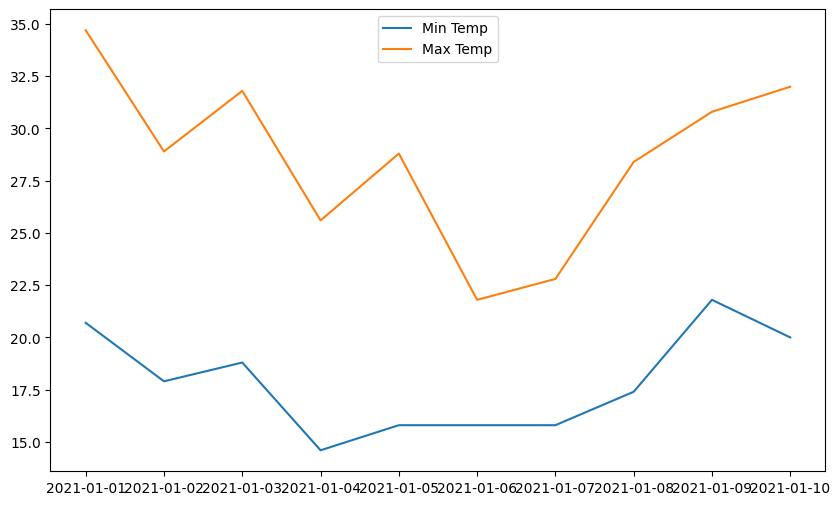

In [37]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# 객체지향 형태로 문법을 시작!

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(dates, min_temperature, label = "Min Temp")
ax.plot(dates, max_temperature, label = "Max Temp")
print(type(ax))

ax.legend(loc=9)
#ax.set_xlabel("Dates")
#ax.set_ylabel("Temp")
#ax.set_title("title")

plt.show()

In [38]:
!pip install yfinance --upgrade --no-cache-dir

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ----- ---------------------------------- 0.4/3.0 MB 8.1 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 9.2 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 8.4 MB/s eta 0:00:01
     ------------------- -------------------- 1.4/3.0 MB 8.2 MB/s eta 0:00:01
     ------------------------- -------------- 1.9/3.0 MB 8.5 MB/s eta 0:00:01
     -------------------------------- ------- 2.4/3.0 MB 9.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 9.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import yfinance as yf
TSM = yf.download("TSM", start="2020-01-01", end="2024-07-02")
TSM.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.599998,60.119999,59.599998,60.040001,54.879215,8432600
2020-01-03,58.970001,58.980000,58.040001,58.060001,53.069405,10546400
2020-01-06,57.599998,57.689999,57.130001,57.389999,52.456997,8897200
2020-01-07,57.450001,58.599998,56.740002,58.320000,53.307056,7444300
2020-01-08,58.189999,58.980000,58.110001,58.750000,53.700096,5381500


C:\Users\user\AppData\Local\Temp\ipykernel_23368\4119233810.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(TSM['Open'].index,rotation = 70)


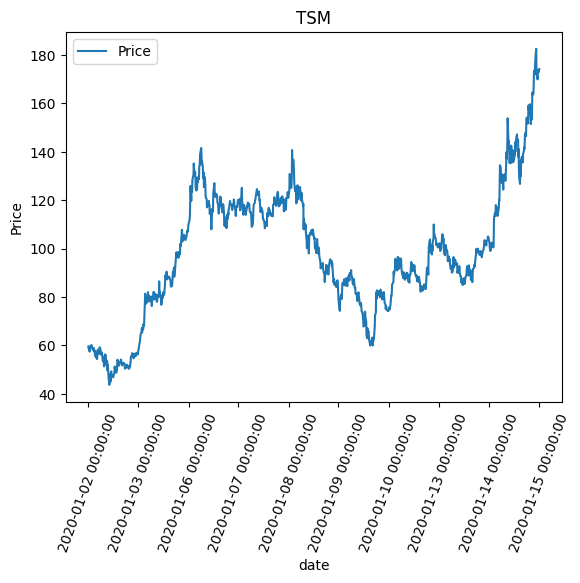

In [62]:
fig, ax = plt.subplots()
ax.plot(TSM['Open'])
ax.set_title("TSM")
ax.set_xlabel("date")
ax.set_ylabel("Price")
ax.legend(labels = ["Price"], loc = 'best')
ax.set_xticklabels(TSM['Open'].index,rotation = 70)
plt.show()

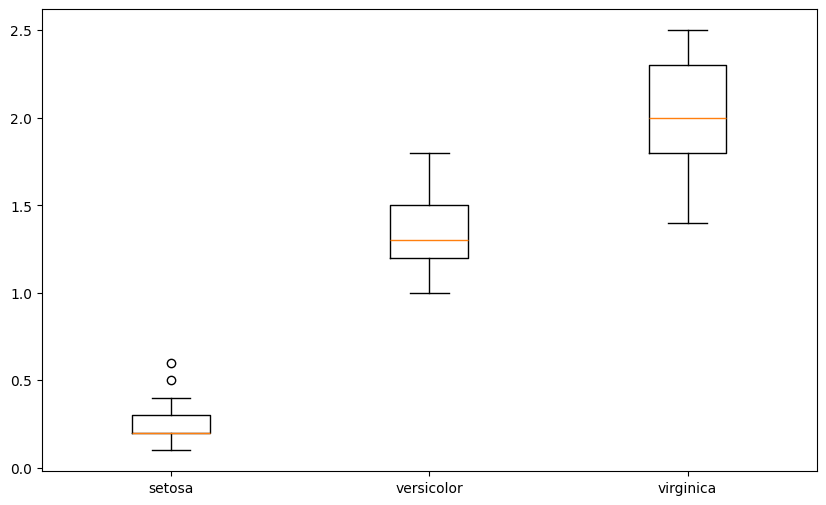

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, tick_labels=['setosa', 'versicolor', 'virginica'])

plt.show()

<class 'matplotlib.axes._axes.Axes'>


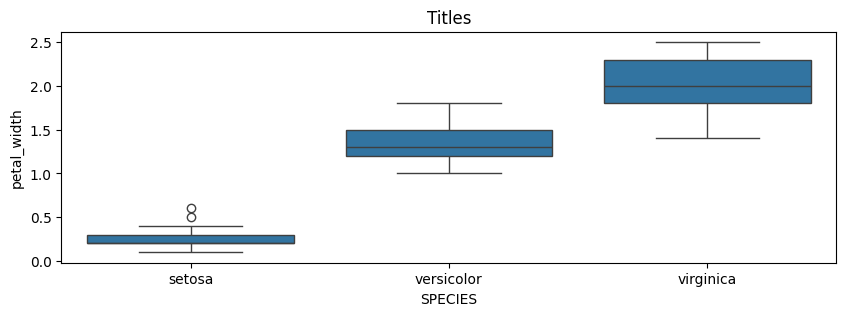

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(data = iris, x = 'species', y= 'petal_width', ax = ax)
ax.set_title("Titles")
ax.set_xlabel("SPECIES")
print(type(ax))
plt.show()

##  막대 그래프 그려보기

In [69]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

## 데이터 불러보기

In [73]:
import seaborn as sns 

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##  기초 데이터

In [92]:
group_mean = tips.groupby(['day'], observed = False)['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
#h_day = group_mean.idxmax()
h_mean = float(np.round(group_mean.sort_values(ascending=False).values[0], 2))
h_day, h_mean

('Sun', 21.41)

## 축 옵션 UDF 함수

In [115]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

## 시각화 객체지향선언

Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


C:\Users\user\AppData\Local\Temp\ipykernel_23368\912950110.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12) # 밑에 축에 글씨 변경
C:\Users\user\AppData\Local\Temp\ipykernel_23368\912950110.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size =12)


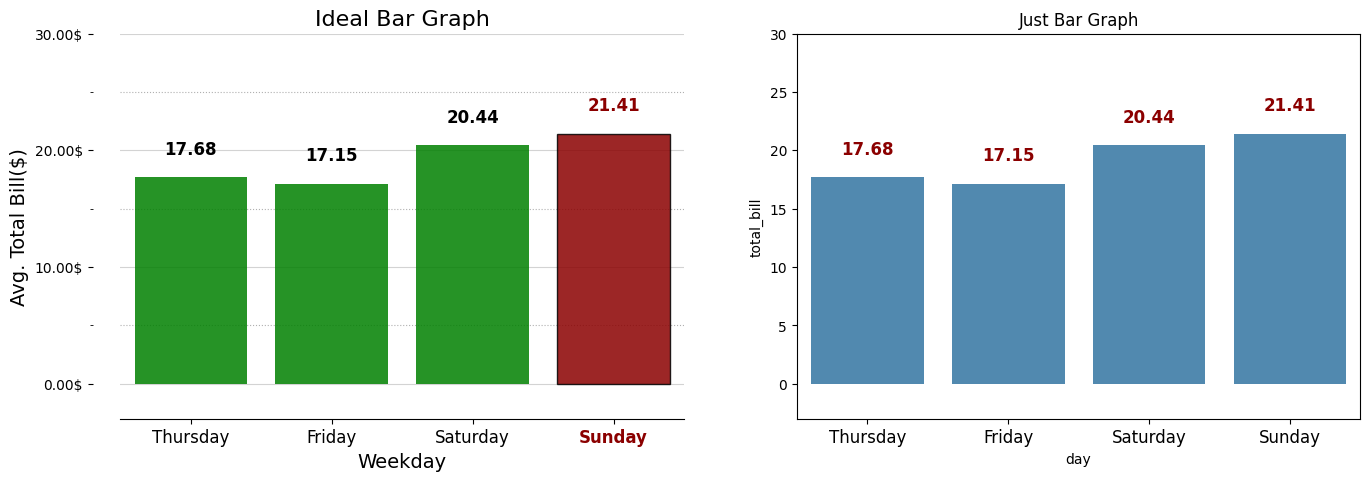

In [135]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,5))
ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips,
                  errorbar= None, color = 'lightgray', alpha = 0.85, zorder = 2,
                  ax = ax[0])
for p in ax0.patches:
    #print(p, type(p))
    fortweight = 'normal'
    color = 'k'
    height = np.round(p.get_height(), 2)
    #print(height)
    if h_mean == height:
        # Sun이면 색상을 다르게 주겠다
        fontweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')
    else:
        p.set_facecolor('green')
    ax0.text(p.get_x() + p.get_width()/2., height+2, height, ha = 'center',
        size=12, fontweight=fontweight, color=color)
        
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)

for xtick in ax0.get_xticklabels():  # 밑에 글자 색상 변경하기 위함
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12) # 밑에 축에 글씨 변경
    





ax1 = sns.barplot(x = 'day', y = 'total_bill', data = tips,
                    errorbar = None, alpha = 0.85, ax = ax[1])

ax1.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size =12)

for p in ax1.patches:
    height= np.round(p.get_height(), 2)
    ax1.text(p.get_x() + p.get_width()/2., height+2, height, ha = 'center',
        size=12, fontweight=fontweight, color=color)
ax1.set_ylim(-3,30)
ax1.set_title("Just Bar Graph")
plt.show()